# 1. Bayesian Inference 
So, you want to know about **Bayesian Techniques** and how they are utilized in Machine Learning? Maybe you have head about the **Causal Revoluation** and want to get a better understanding of the role these techniques played in getting there? Or, you have determined that your problem would be best solved Bayesian A/B Testing? Whatever your reasoning, you have come to the right place. However, before we dissect the techniques listed above, and many others, we need to determine two things:

1. What flaws exist with **Frequentist Statistics**? 
2. What is meant by **Bayesian Statistics**, and how do they help counteract the shortcomings of 1?

Now, I have several posts concerning statistics and probability that I highly recommend reading before continuing (in my math section). However, if you are comfortable with those subjects feel free to continue. The outline of frequentist statistics below are comparatively sparse, since I already have several posts dedicated to their mechanics and intuitions. Below, we cover just enough to see what drawbacks exist in the sub field. With that said, let's get started!

## 1.1 Frequentist Statistics
**Frequentist statistics** test whether an event (_hypothesis_) occurs or not. They calculate the probability of an even in the long run of the experiment-i.e. the experiment is repeated under the same conditions to obtain the outcome. 

Here, the sampling distributions of **fixed size** are taken. Then, the experiment is theoretically repeated an **infinite** number of times, but practically done with a stopping iteration. For example, I perform an experiment with a stopping iteration in mind, say I will stop the experiment after it has been repeated 1000 times. 

This can be demonstrated with a simple example involving a coin toss. Here, we are trying to estimate the fairness of the coin:

|No. of tosses|No. of heads|Difference|
|-------------|------------|----------|
|10|4|-1|
|50|25|0|
|100|44|-6|
|500|255|5|
|1000|502|2|
|5000|2533|33|
|10000|5067|67|

Now, we know that the probability of getting a head on tossing a fair coin is 0.5. We know that the number of heads represents the number of heads obtained. And, we know that the difference is:

$$0.5*(\text{No. of tosses}) - (\text{No. of heads})$$

An important thing is to note that, though the difference between the actual number of heads and expected number of heads (50% of the number of tosses) increases as the number of tosses are increased, the proportion of number of heads to total number of tosses approaches 0.5 (for a fair coin). 

And just like that, our incredibly simple experiment presents us with a very common flaw found the in frequentist approach:

> The result of an experiment is dependent on the number of times the experiment is repeated.

### 1.2 Flaws in Frequentist Statistics
So, let's dig into the flaws of frequentist statistics a bit more thoroughly. There are three main ones that rise above the rest:

#### $p$-values depend on sample size
The **_p_-value** is the probability of obtaining an effect at least as extreme as that in your data, _if_ the null hypothesis is true. Well, because the $p$-value is determined based on the value of a test statistic, and that test statistic is always a function of the number of iterations (i.e. number of coin tosses), if two people work on the exact same data and data generating processes, they may get different $p$-values if their sample size changes. This is clearly undesirable! 

An example may make this more concrete: Person A may choose to stop tossing a coin when the total count reaches 100 while B stops at 1000. For different sample sizes, we get different t-scores and different p-values. Similarly, intention to stop may change from fixed number of flips to total duration of flipping. In this case too, we are bound to get different p-values.

#### Confidence Interval depends on sample size
Like the $p$-value, our confidence interval depends heavily on the sample size. This flies in the face of the goal of statistics! We are trying to determine the ground truth underneath our data. If two people are working with the exact same data set and generating processes, their result's (and certainly the significance) should be consistent.

#### Confidence Intervals are not probability distributions
Because confidence intervals are not probability distributions, they do not provide the most probable value for a parameter. They simple state that (in the case of a 95% confidence interval) if we were to repeat the process of performing the experiment and generating the confidence interval many times, 95% of the confidence intervals would contain the true population mean. This is described in more detail in my post concerning statistical inference and hypothesis testing.

Now, what approach could we take that would allow us to solve the issues above? Specifically, how can **Bayesian Statistics** help us get past frequentist statistics shortcomings?

## 2. Bayesian Statistics
A very simple, yet precise description of bayesian statistics is as follows:

> Bayesian statistics is a mathematical procedure that applies probabilities to statistical problems. It provides people the tools to update their beliefs in the evidence of new data.

However, we can't dissect bayesian statistics without first understanding **Bayes Theorem**. So, that is where we will begin. 

### 2.1 Bayes Theorem
Let's say that we are faced with the following scenario:

* 1% of women have breast cancer (and therefore 99% do not).
* 80% of mammograms detect breast cancer when it is there (and therefore 20% miss it).
* 9.6% of mammograms detect breast cancer when it’s not there (and therefore 90.4% correctly return a negative result).

We can put this into a table that looks like this:

|_____|Cancer (1%)|No Cancer (99%)|
|----|----|----|
|Test Positive|80%|9.6%|
|Test Negative|20%|90.4%|

Here is how we read the table: 
* 1% of women have cancer
* If you already have cancer, you are in the first column. There’s an 80% chance you will test positive. There’s a 20% chance you will test negative.
* If you don’t have cancer, you are in the second column. There’s a 9.6% chance you will test positive, and a 90.4% chance you will test negative.

And, here is how we could represent this graphically:

<img src="https://drive.google.com/uc?id=1UCiKrRWdf94mtpQ2xH-FCChrNLucnQos" width="700">

Keep the above diagram in mind as we go through this example, it is invaluable in thinking of the situation intuitively. 

#### How accurate is the test? $\rightarrow$ Intuitive Reasoning
Now supposed that your get a positive test result. What are the chances that you have cancer? 80%? 99%? 15? Lets walk through it. 
* Ok, we got a positive result. It means we’re somewhere in the top row of our table. Let’s not assume anything — it could be a true positive or a false positive.
* The chances of a true positive are equal to: the chance you have cancer * chance test caught it = 1% * 80% = .008
* The chances of a false positive are equal to: the chance you don’t have cancer * chance test caught it anyway = 99% * 9.6% = 0.09504
Lets update our table with this information:

|______________|Cancer (1%)    |No Cancer (99%)      |
|--------------|---------------|---------------------|
|Test Positive|1% x 80% = 0.008|99% x 9.6% = 0.09504 |
|Test Negative|1% x 20% = 0.002|99% x 90.4% = 0.89496|


What was our question again? **What’s the chance we really have cancer if we get a positive result?**. Well, the chance of an event is the number of ways it could happen given all possible outcomes. This leads us to some general intuition about probability! 

$$Probability = \frac{desired \; event}{all \; possibilities}$$

What does that look like in our case? Well we have:
* Desired event = Given a positive test, we have cancer
* All possibilities = A postive test and having cancer + a positive test and having no cancer

In other words:

$$Probability \; of \;cancer \;given\;positive\;test = \frac{positive\;test\;and\;cancer}{positive\;test\;and\;cancer+positive\;test\;and\;no\;cancer}$$

And if we fill in our values from the table we arrive at:

$$Probability = \frac{0.01*0.8}{0.01*0.8+0.99*0.096}=0.0776=7.6\%$$

**Interesting!** — a positive mammogram only means you have a 7.8% chance of cancer, rather than 80% (the supposed accuracy of the test). It might seem strange at first but it makes sense: the test gives a false positive 9.6% of the time (quite high), so there will be many false positives in a given population. For a rare disease, most of the positive test results will be wrong.

Let’s test our intuition by drawing a conclusion from simply eyeballing the table. If you take 100 people, only 1 person will have cancer (1%), and they’re most likely going to test positive (80% chance). Of the 99 remaining people, about 10% will test positive, so we’ll get roughly 10 false positives. Considering all the positive tests, just 1 in 11 is correct, so there’s a 1/11 chance of having cancer given a positive test. The real number is 7.8% (closer to 1/13, computed above), but we found a reasonable estimate without a calculator.

#### How accurate is the test? $\rightarrow$ Application of Bayes Theorem
Now, we can use a more concrete mathematical framework to solve this problem! Recall (from previous posts), Bayes theorem is defined as: 

$$P(A|B)=\frac{P(A)*P(B|A)}{P(B)}$$

In our example, the application of Bayes Theorem would look like:

$$P(cancer\;|\;positive\;test)=\frac{P(cancer)*P(positive\;test\;|\;cancer)}{P(positive\;test)}$$

$$\frac{0.01*0.8}{0.01*0.8+0.99*0.096}=7.8\%$$

This yields the same result as our general intuition equation! Maybe Bayes theorem isn't so hard after all...

### 2.2 A Scientific Perspective: Induction vs. Deduction
After going through the above examples, you may have the following feeling: "This all makes sense when we break it down and walk through it step by step, but it didn't feel intuitive". If that is an accurate description of you right now, take solace in the fact that I was (and still am for the most part) the same way. You see, there are a few factors that leave our intuition lacking when dealing with Bayes rule.

#### 2.2.1 Induction vs Deduction
In the scientific process, there are two main forms of reasoning: **deduction** and **induction**. Deduction is the more familiar of the two, and works as follows:

<img src="https://drive.google.com/uc?id=1kRqKhLAi4rDCKpwiSy70NvD0RdDE5a39" width="700">

So, we form some hypothesis about the state of the world or it's workings, gather data about that state, and then see if our data confirms or denies our hypothesis. That is deduction. We perform deduction every day with relative ease. 

Then, there is induction, which looks like:

<img src="https://drive.google.com/uc?id=1P0ojSU-S8g_TjI9ZFc2csZj6oeIYZQ1u" width="700">

Here, we gather data about the world around us, and after picking up on a pattern we induce a hypothesis, and then work towards concluding it's validity. Now, it should be noted that this idea of reasoning from _evidence_ to _hypothesis_ can be thought of as a parallel of reasoning from _effect_ to _cause_. 

And this is where Thomas Bayes stepped in. He was concerned with the specific probabilities of two events, one (the hypothesis) occuring before the other (the evidence). This lead him to coin the term **inverse probability**.

#### 2.2.2 Inverse and Forward Probabilities
Thomas Bayes showed that you can deduce the probability of a _cause_ from an _effect_. Now, if you know the cause of something, it is easy to estimate the probability of the effect; this is known as the **forward probability**. In other words, the probability in the causal direction. For instance, if you know it is raining (the cause) you would experience no discomfort in estimate the probability that someone is holding an umbrella (the effect). 

However, going in the opposite direction, aka finding the **inverse probability**, is much harder. To demonstrate why, we need to create an example derived from Bayes original paper. Imagine that you shoot a billiard ball on a table, making sure that it bounces as many times as possible so that we have no idea where it will end up (i.e. making it random).

<img src="https://drive.google.com/uc?id=1XlW4UrUv2JsLjReEdEPkJ7zbHYjSU4wH" width="500">

Well, if we know the length of the table, $L$, this is a very easy question to answer. For instance, if $L$ is 10 feet, and we want to know the probability of the ball stopping within $x = 1 ft$ of the end of the table, we know that the probability is:

$$p(x =1 \mid L=10) = \frac{1}{10}$$

What we just solved for was the _forward probability_. Our intuitive understanding of physics tells us that the longer the table, the lower the probability of landing in the sub region, because there are more final resting places that the ball can end up. Likewise, the larger that the subregion is (the larger $x$ is), the higher the probability of landing there because it contains a larger set of stopping positions. 

Now, let's consider the _inverse probability_ problem:

<img src="https://drive.google.com/uc?id=1DApIrDRK--BQLkDr7uqZMRjeleJAncLB" width="400">

Here, we _observe_ the final position of the ball to be $x=1$ foot away from the end of the table. However, we are not given the length $L$ of the table. The question that can be asked then is: What is the probability that the table is 100 feet long?

$$P(L=100 \mid x=1)$$

Common sense tells us that the table is more likely to be 50 feet vs. 100 feet, however, it gives no clear guidance as to _how much more likely_. 

Why exactly was the forward probability so much easier to solve for compared to the inverse probability? In this case, the asymmetry comes from the fact that $L$ acts as the cause, and $x$ as the effect. Note, we are starting to get to more fundamental principles. Imagine that you observe someone throwing a rock at a window (a cause). All of us can predict, without a problem, that the window is most likely going to break. Human cognition is designed to work in this direction. However, if we are just given the effect-the broken window-we need much more information in order to deduce the cause (that it was even a rock that broke the window in the first place, since it could have easily been many other things).

Bayes set out to break this cognitive asymmetry and explain how to assess inverse probabilities. Perhaps the most important role of Baye's rule in statistics (remember, we used it earlier in the cancer example) is:

> We can estimate the conditional probability directly in one direction, in which our human judgement is more reliable, and use mathematics to derive the conditional probability in the other direction, for which our judgement is rather hazy. 

#### 2.2.3 A Philosophical Question
One way to look at Bayes theorem is as a method for updating your **beliefs** in a certain hypothesis. This is very important to understand, because a large part of human belief about future events rests on the frequency with which they or similar events have occured in the past.  

For instance, in the cancer example, we can think of the application of bayes rule as the updating of our beliefs that we have cancer, given a positive test. We perform the update by including new evidence, namely the overall probablity of having cancer in the general population.

This raises an interesting philosophical question: 

> Can we legitimately translate the expression "given that I know" into the langauge of probabilties? For example, is "given that I know $T$" the same as "among cases where $T$ occurred"?

Originally, the language of probability, expressed in symbols like $P(L \mid X)$ was intended to capture the concept of frequencies in games of chance. However, the expression "given that I know" is **epistemological** and should be governed by logic of knowledge, not by frequencies and proportions. What Thomas Bayes provided was a framework in which we can utilize the concept of probabilty to approximate these epistemological scenarios.

#### 2.2.4 Human Psychology $\rightarrow$ Multiplication of Probabilities and Substitution
There is one final angle that I want to discuss with regards to why the application of bayes rules is often not intuitive. In the book _Thinking, Fast and Slow_, by Daniel Kahneman, he highlights two key biases that humans often have when dealing with probabilistic reasoning. 

The first, relates to the multiplication of probabilities. In general, humans have a difficult enough time dealing with a single probability, never the less multiple. This is exactly the situation that we encounter with bayes rule. We end up multiplying the probability of having cancer in the general population, by the probability of getting a positive test given that you have cancer. This multiplication process is not one that humans deal with gracefully, and often find unintuitive (until breaking it down step by step).

Secondly, and more importantly, when we are faced with a tough question pertaining to probabilities, we often perform **substitution**. Kahneman highlights that the problem solving portion of our mind is often lazy, and will substitute a hard question for a similar, albeit easier one. In the cancer scenario, if asked: 

> What is the probability you have cancer, given a positive test?

We will substitute that for an _easier_ question:

> What is the likelihood you have a positive test, given you have cancer? 

From which we have the probability already at our disposal-80%! What we have done is forgotten our **base rate**, i.e. what is the probability that anyone in the general population has cancer to begin with, in this case 1%. This substitution happens without us even realizing, meaning it is nearly automatic. 

You may wonder, how can you prevent this incorrect intuition of substitution from occurring. Well, first and foremost it should be known that in general this substitution isn't a bad thing. In fact, it is an optimization that occurred via evolution to allow humans to maximize their ability to make decisions pertaining to survival. However, to get around this bias and apply more effective statistical reasoning, the only thing you can do is train your mind to look out for these scenarios. Kahneman recommends _always_ keeping the base rate in mind, and imagine that you are updating it with new evidence. 

## 3. Bayesian Inference
The above example is very helpful to explain where Bayesian Inference comes from and showing the mechanics in action. However, in Data Science applications it is generally used to to interpret data! By pulling in prior knowledge about what we know, we can draw stronger conclusions with small data sets! 

### 3.1 Probability Distributions as Beliefs
In a probability distribution the area must always add up to 1. It's helpful to think of probabilities as **beliefs** about the world; specifically the associated confidence surrounding particular beliefs. For instance, say we wanted to develop beliefs surrounding the height's of people. One way to do that is to utilize a **probability distribution**. So, say we have access to the following height data:

In [3]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from matplotlib import rc, animation
from scipy.stats import norm
import numpy as np
import pandas as pd
from IPython.core.display import HTML

import seaborn as sns
sns.set(style="white", palette="husl")
sns.set_context("talk")
sns.set_style("ticks")

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [44]:
mu, sigma = 5.83, 0.4
normal_dist = np.random.normal(mu, sigma, 1000)
heights = np.around(normal_dist, decimals=2)
indices = np.arange(1,1000)
df_heights = pd.DataFrame({
     'Height (ft)':heights   
})
df_heights.index.rename('Person', inplace=True)

In [45]:
display(df_heights.head(10))

,Height (ft)
Person,
0,6.21
1,6.10
2,6.37
3,5.47
4,6.25
5,5.97
6,6.11
7,5.59
8,6.11


We can then plot a **discrete** distribution (limited in the number of values it can take on), breaking down into smaller and smaller bins (shown below). For instance, if I asked you predict whether someones height (without seeing them) was greater or less than 5 feet 8 inches, your beliefs about their probability may be as follows:

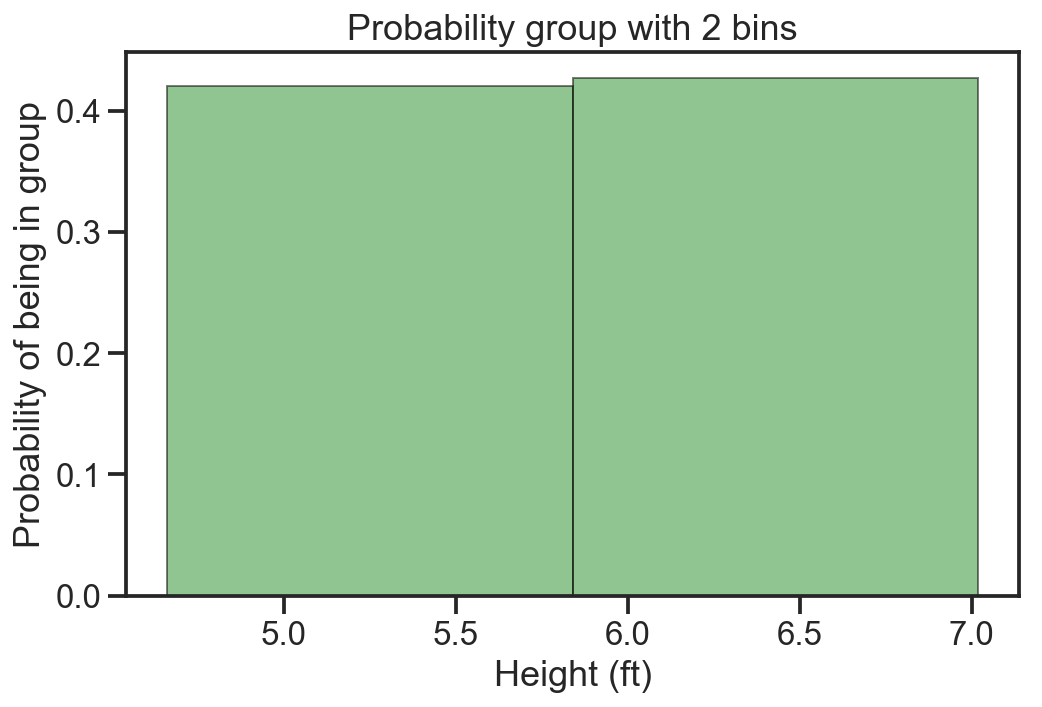

In [88]:
def normal_dist_experiment(num_bins, y_label, title, normed=False, plot_continuous_dist=False):
    fig = plt.figure(figsize=(8,5))

    count, bins, ignored = plt.hist(
        heights,
        num_bins,
        density=normed,
        color='forestgreen',
        alpha=0.5,
        linewidth=1,
        edgecolor='black'
    )
    if plot_continuous_dist:
        y = 1/(sigma * np.sqrt(2 * np.pi)) *np.exp( - (bins - mu)**2 / (2 * sigma**2) )
        plt.plot(
            bins,
            y,
            linewidth=2,
            color='r'
        )
        plt.fill_between(bins, y, color=sns.xkcd_rgb["light green"], alpha=0.4)
    plt.xlabel(f'Height (ft)')
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()
    
normal_dist_experiment(2, 'Probability of being in group', f'Probability group with {2} bins', normed=True)

If I then changed the question, asking you the probability of which of the 5 bins below their height fell into, you beliefs may look something like:

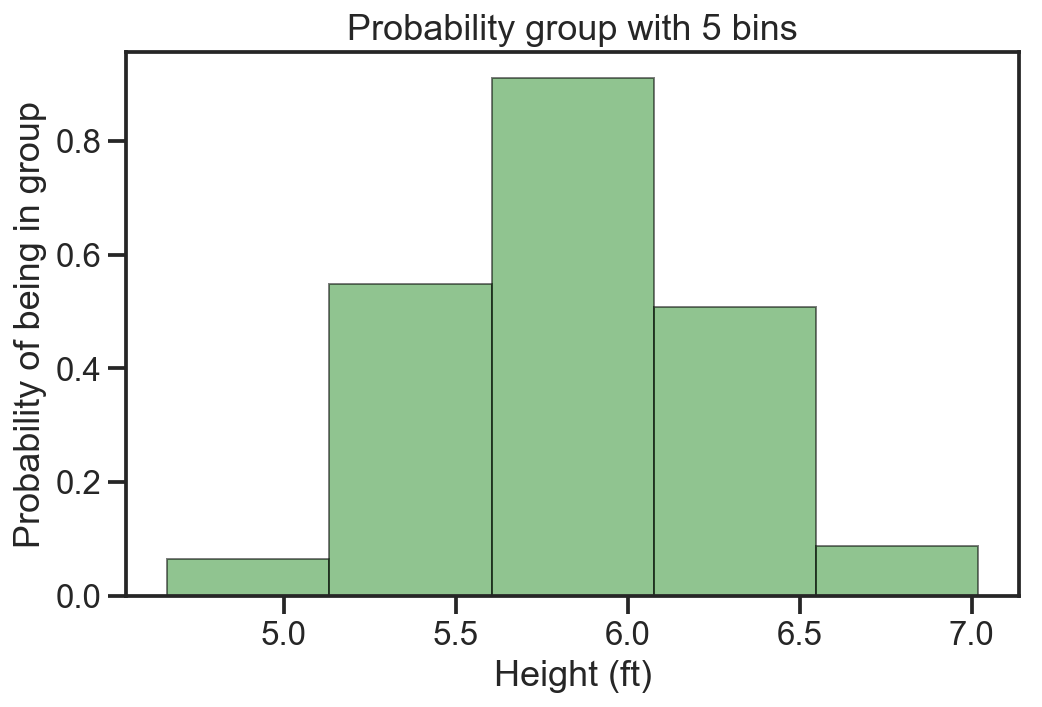

In [81]:
normal_dist_experiment(5, 'Probability of being in group', f'Probability group with {5} bins', normed=True)

And we could keep breaking the distributions into finer and finer bins, slowly creating a finer-grained set of beliefs:

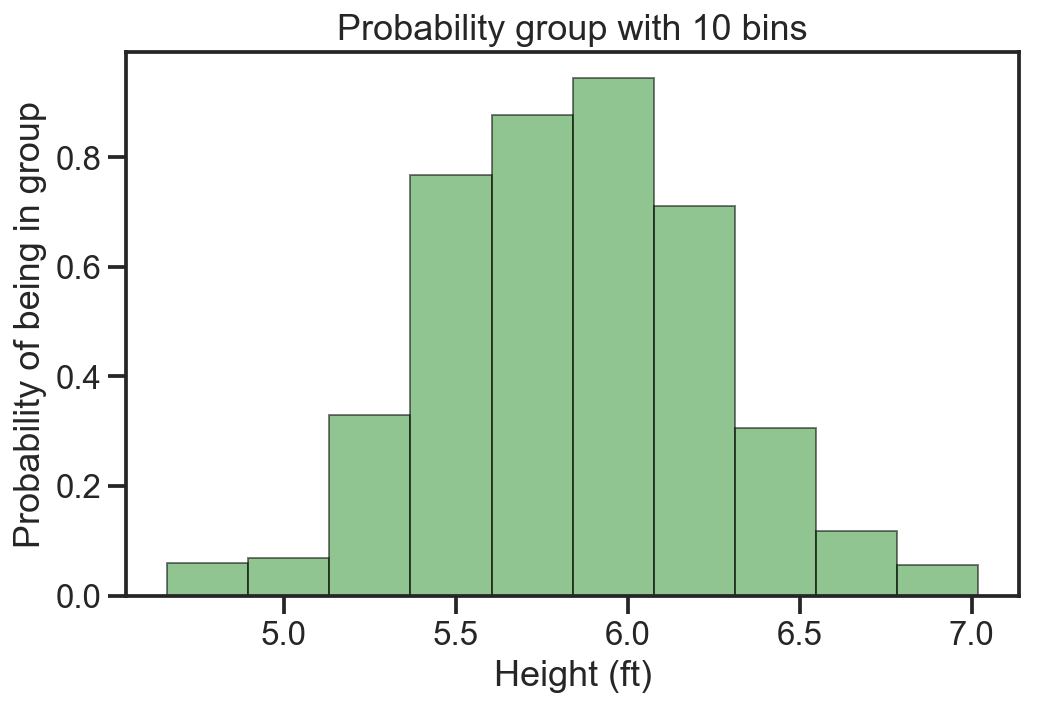

In [82]:
normal_dist_experiment(10, 'Probability of being in group', f'Probability group with {10} bins', normed=True)

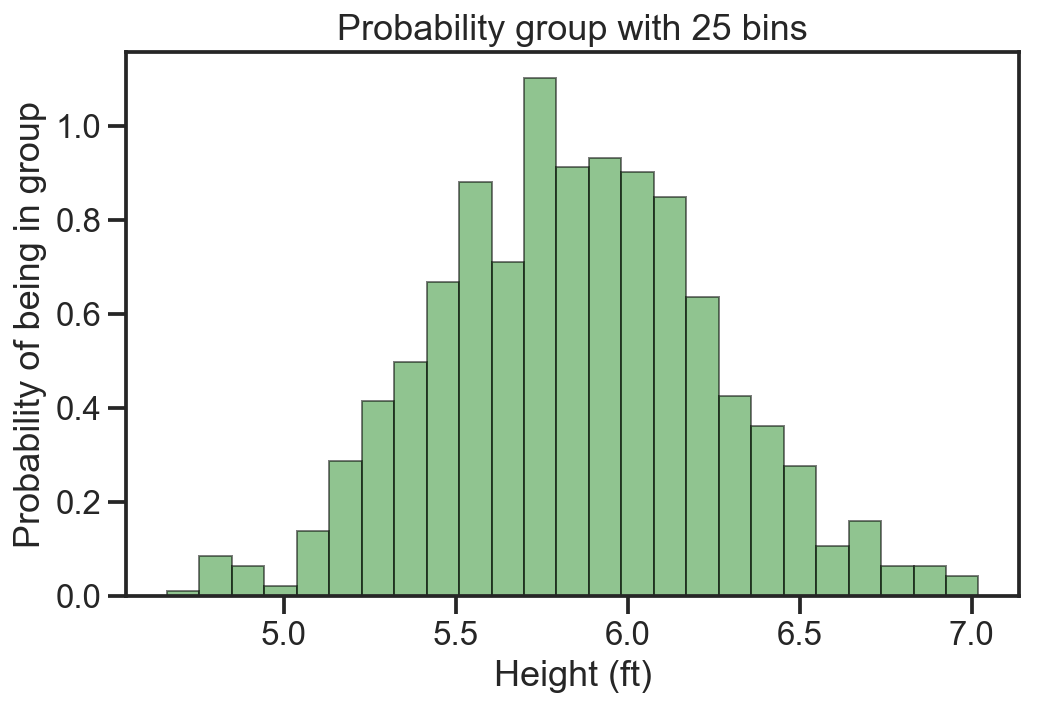

In [83]:
normal_dist_experiment(25, 'Probability of being in group', f'Probability group with {25} bins', normed=True)

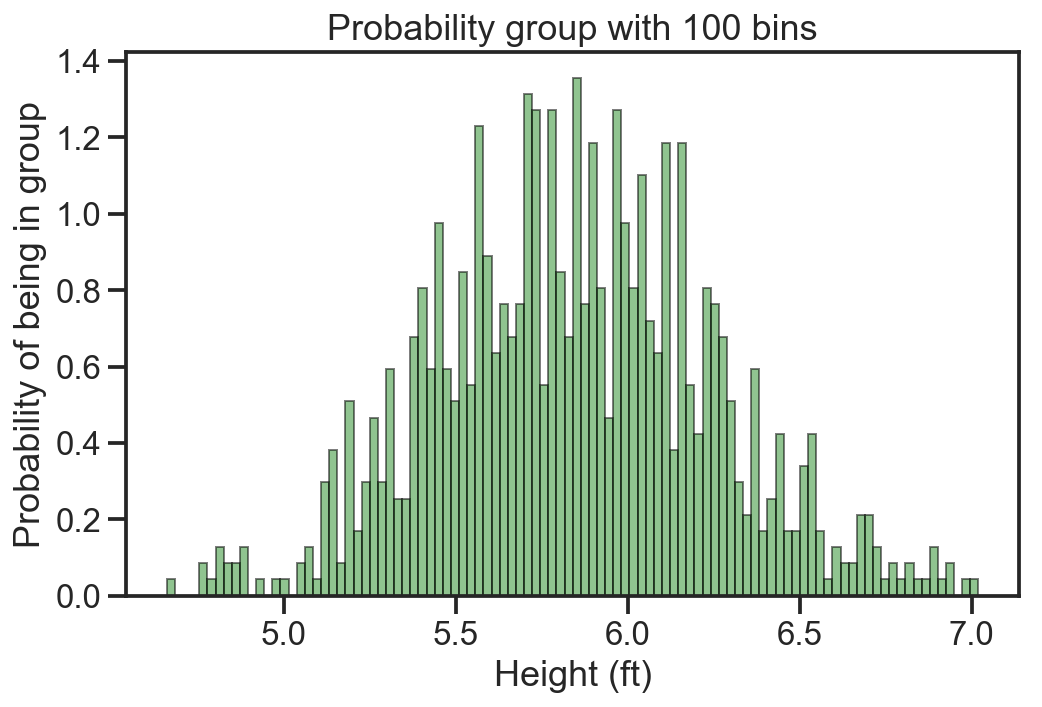

In [84]:
normal_dist_experiment(100, 'Probability of being in group', f'Probability group with {100} bins', normed=True)

Until the distribution has finally become continuous! It is import to remember that this continuous distribution still shows how your belief is allocated! 

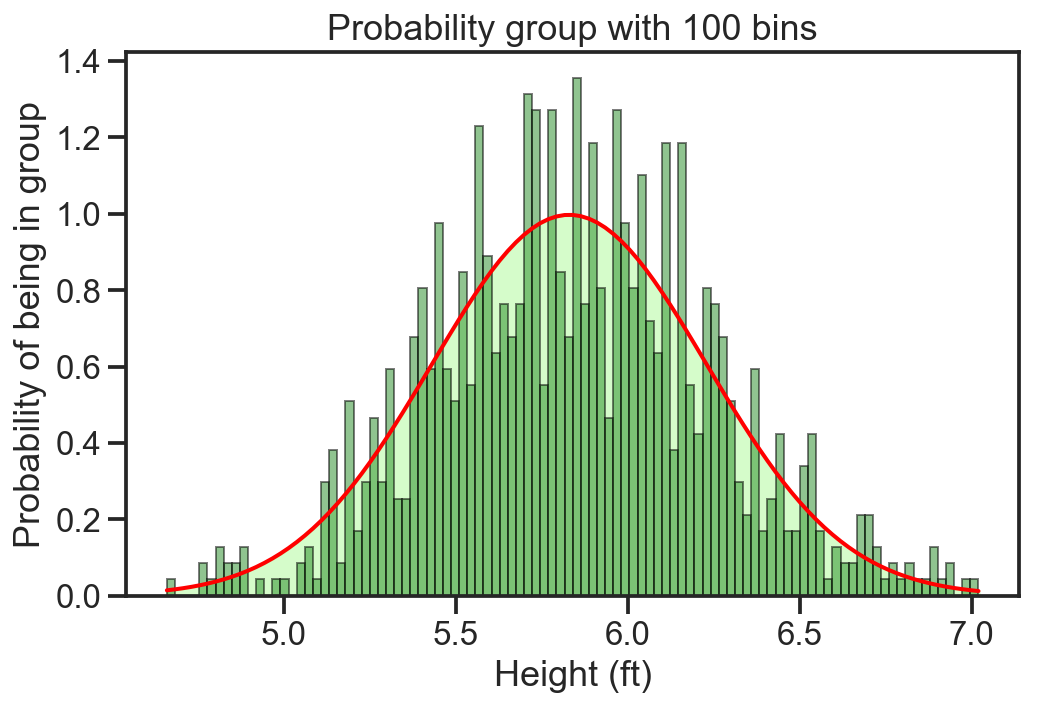

In [89]:
normal_dist_experiment(
    100,
    'Probability of being in group',
    f'Probability group with {100} bins',
    normed=True,
    plot_continuous_dist=True
)

Once you have your beliefs, you can determine things such as the average, median, standard devation:

In [55]:
print('Mean height: ', np.around(heights.mean(), decimals=2), 'ft')
print('Median height: ', np.around(np.median(heights), decimals=2), 'ft')
print('Standard deviation in height: ', np.around(heights.std(), decimals=2), 'ft')

Mean height:  5.84 ft
Median height:  5.84 ft
Standard deviation in height:  0.4 ft


The key intuition to remember here is that we can think of probability distributions as: 

> For all of these heights, where am I placing my bets? What do I believe, and how much?

The whole point is to determine your beliefs! Once you have your beliefs you can determine the average, median, mode, etc!

### 3.2 Bayesian Inference Example
Let's look at an example of Bayesian Inference in the context of updating our beliefs. Say we are weighing our dog at the vet's office. When we take the dog to the vet, it squirms on the scale which makes it difficult to get an accurate reading. At the last visit, we got 3 readings for the dogs weight: 

$$\text{13.9 lb, 17.5 lb, 14.1 lb}$$

There is a _standard statistical interpretation_ for this. We are able to calculate the mean, standard deviation, and standard error for this set of numbers and create a distribution for the dogs actual weight! 

#### Calculate the Mean

In [115]:
sample_weights = np.array([13.9, 17.5, 14.1])
mu = sample_weights.mean()
print("Sample Mean: ", mu)

Sample Mean:  15.166666666666666


#### Calculate the Standard Deviation (sample)

In [116]:
N = len(sample_weights)
df = N - 1 
ddof = N - df
sigma = sample_weights.std(ddof=ddof)
print("Sample Standard Deviation: ", sigma)

Sample Standard Deviation:  2.023198787399136


#### Calculate the Standard Error

In [117]:
std_error = sigma / np.sqrt(N)
print("Standard Error: ", std_error)

Standard Error:  1.1680943645290156


From these statistics, we can now formally represent our beliefs about the dogs weight via a probability distribution! Specifically, we have what is needed to parameterize the normal distribution. Recall, a sample mean, $\hat{\mu}$, is a random variable and will tend to a Gaussian Distribution (based on the central limit theorem):

$$\hat{\mu} \approx N(\mu, \frac{\sigma^2}{N})$$

Where this variance is simply the standard error:

$$\hat{\mu} \approx N(\mu, stderr)$$

Note that while this function is parameterized by $\mu$, the population mean, and we only have access to $\hat{\mu}$, this is okay! The population mean will be the true mean of $\hat{\mu}$, and we can use this estimate as an approximation. This is why I used the approximation symbol earlier.

So, with that said, let's get a visual of the dogs weights:

In [118]:
def get_y_height(y_min, y_max, actual_y_pos):
    total_height = abs(y_min) + abs(y_max)
    height_of_point = abs(y_min) + actual_y_pos
    return height_of_point / total_height

def plot_mean(y_min, y_max):
    # Plotting mean
    plt.axvline(
        x=mu,
        color=sns.xkcd_rgb["grey"], 
        ymax=get_y_height(y_min, y_max, norm.pdf(mu, mu, std_error)),
        ymin=get_y_height(y_min, y_max, 0),
        alpha=0.5,
        linestyle="dashed",
        lw=1
    )
    

def plot_standard_error(y_min, y_max):
    # Plotting standard error
    plt.axvline(
        x=mu-std_error,
        color=sns.xkcd_rgb["sea blue"],
        ymax=get_y_height(y_min, y_max, norm.pdf(mu-std_error, mu, std_error)),
        ymin=get_y_height(y_min, y_max, 0),
        linestyle="dashed",
        lw=1
    )
  
    plt.axvline(
        x=mu+std_error,
        color=sns.xkcd_rgb["sea blue"],
        ymax=get_y_height(y_min, y_max, norm.pdf(mu+std_error, mu, std_error)),
        ymin=get_y_height(y_min, y_max, 0),
        linestyle="dashed",
        lw=1
    )

    
def plot_measurements(measurements, y_min, y_max):
    # Plotting our measurements
    for measurement in measurements:
        plt.axvline(
            x=measurement,
            color=sns.xkcd_rgb["light purple"],
            ymax=get_y_height(y_min, y_max, norm.pdf(measurement, mu, std_error)),
            ymin=get_y_height(y_min, y_max, 0),
        )
        plt.scatter(
            measurement,
            norm.pdf(measurement, mu, std_error),
            c=sns.xkcd_rgb["light purple"],
            zorder=5,
            alpha=0.5
        )
        plt.scatter(measurement, 0, c=sns.xkcd_rgb["neon purple"], zorder=5)

        
def setup_axes(ax):
    # setting axes
    ax.set_xlabel('Weight in Pounds', fontsize=14)
    ax.set_ylabel('Probability', fontsize=14)
    ax.tick_params(labelsize="large")
    ax.set_title('Normal Distribution of Dogs weight',fontsize=16)
    ax.legend(
        ['Weight Distribution',
         'mean',
         'standard error',
         'standard error',
         'measurements'
        ], 
        fontsize=14,
        bbox_to_anchor=(1, 1)
    )
    
    
def plot_dist(measurements, mu, std_error):
    fig, ax = plt.subplots(figsize=(8,5))

    # plotting distribution
    x = np.linspace(mu - 3.5*std_error, mu + 3.5*std_error, 100)
    y = norm.pdf(x, mu, std_error)
    plt.plot(x, y, c=sns.xkcd_rgb["grey"], lw=1)
    plt.fill_between(x, y, color=sns.xkcd_rgb["light blue"], alpha=0.2)
    plt.ylim(-0.01)
    y_min, y_max = ax.get_ylim()

    plot_mean(y_min, y_max)
    
    plot_standard_error(y_min, y_max)
    
    plot_measurements(measurements, y_min, y_max)
    
    setup_axes(ax)

    return plt.show()

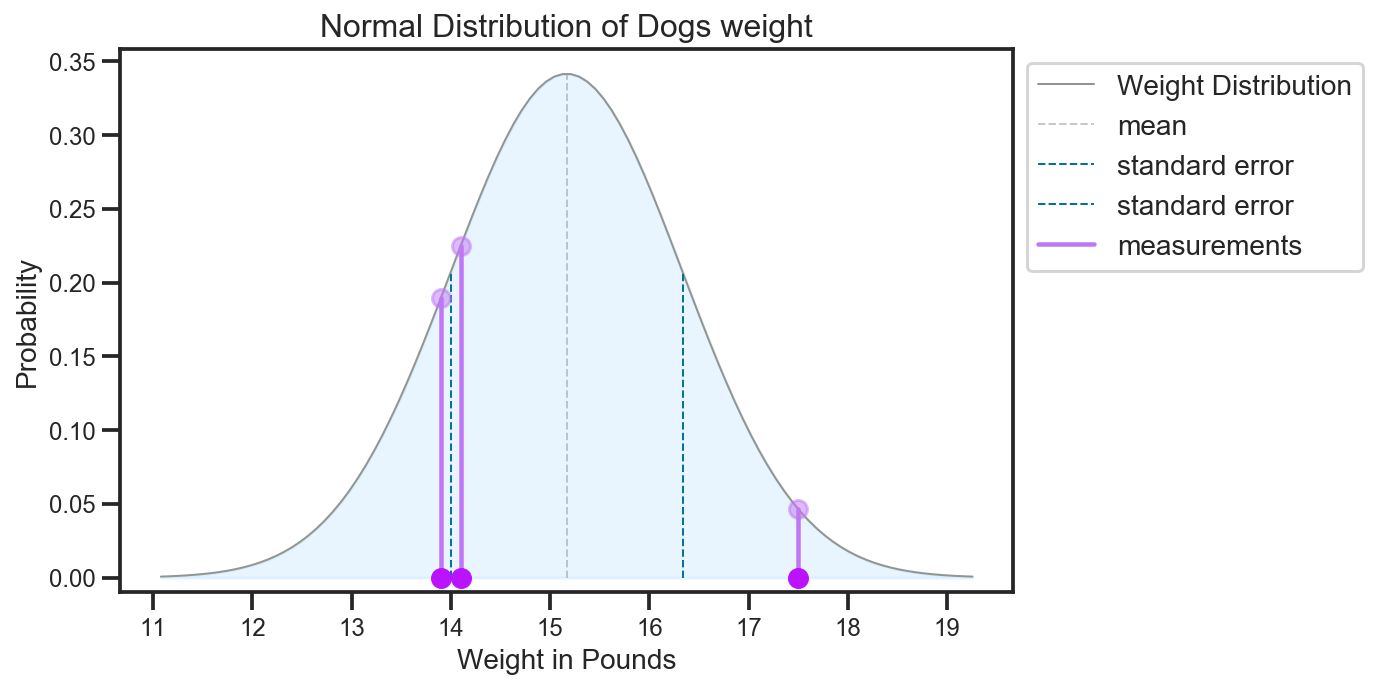

In [119]:
plot_dist(sample_weights, mu, std_error)

So, the distribution shows what we believe using this approach. It is normally distributed with a mean of 15.2 lbs, and a standard error of 1.2 lbs. The actual measurements are shown in purple. Unfortunately, this curve is unsatisfyingly wide. While the peak is at 15.2 lbs, the probability distribution could easily be as low as 13 lbs or as high as 17 lbs. This is much to wide to make any kind of confident decision. 

What options do we have at this point? It is common at times like this to go back and try to gather more data, but that may be infeasible or too expensive. At times like these we are usually stuck with the measurements that we already have. In this case, the dogs patience is used up and we must move on with our 3 initial measurements. 

And that is where Bayes Theorem comes in...

### Bayes Theorem to the Rescue
Bayes Theorem is very useful in making the most out of small data sets. Lets take a minute to go over what it looks like again. 

$$P(A|B)=\frac{P(B|A)*P(A)}{P(B)}$$

or in our case: 

$$P(weight\;|\;measurements)=\frac{P(measurements\;|\;weight)*P(weight)}{P(measurements)}$$

simplified to:

$$P(w\;|\;m)=\frac{P(m\;|\;w)*P(w)}{P(m)}$$

We can clearly see 4 terms above. Each of these terms represents a different part of the process.

#### P(w) - Prior
This represents our **prior beliefs**. In this case it represents what we believe about the dogs weight before we even put it on the scale

> "The probability of cancer before you know the test result"

#### P(m | w) - Likelihood
This is the **likelihood** that our measurements would occur, given a particular weight. For example, given that the dogs weight is 200lbs, what is the likelihood that we measure her to be 13.9,14.1, and 17.5 lbs?

> "If you know the patient has cancer, how likely are you to get a positive test result?"

#### P(w | m) - Posterior
This is the **posterior**, which shows the probability of the dog being a weight, given the measurements that we made; this is what we are most interested in finding.

> "What do we believe the probability of cancer is, given the test result?"

#### P(m)
This is the probability of data, showing the probability that any given data point will be measured. We will assuming this is constant, i.e. that the scale is unbiased.

We can think of this formula as saying: "lets start with a belief $P(w)$, take some measurements and update it with $P(m|w)$, and then we have a new belief once done-$P(w|m)$. 

Okay great, so at this point, it is not a terrible idea to start perfectly agnostic and making no assumptions about the result. In this case, we assume that the dogs weight is equally likely to be 13 lbs, or 15 lbs, or 1 lbs, or 100000 lbs, and we will let the data speak. 

To do this we assume a uniform prior, meaning that its probability is a constant for all values. This allows us to reduce our equation to:

$$P(w\;|\;m) = P(m\;|\;w)$$

So we now want to calculate this- that is we want to calculate the probability of our measurements occuring, given a weight. We will want to do this for all of the possible weights! 

### Calculation
So this is what our equation looks like, given the weight 17lbs.

$$P(w=17\;|\;m=[13.9,14.1,17.5] = P(m=[13.9,14.1,17.5]\;|\;w=17))$$

So, given a weight of 17 lbs, what does our probability distribution look like?

In [179]:
def mle_gaussian(x, mu, sigma):
    likelihood_of_data = norm.pdf(x, mu, sigma)
    log_likelihood_of_data = np.log(likelihood_of_data)
    return np.sum(log_likelihood_of_data)

In [181]:
lower_bound = 12
upper_bound = 20
length = 2000

plt.ioff()                          

fig = plt.figure(figsize=(12, 5))       
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

ax2.set_title(r"Total Likelihood of Observations vs. $w$", pad="10")
ax2.set_xlabel(r"$w$ (weight, lbs)", fontsize=20)

means = np.linspace(lower_bound, upper_bound, length)
sigma = std_error
expected_mean = mu
x_axis = np.arange(12, 20, 0.001)

# Set expected weight/mean in MLE plot
ax2.axvline(x=expected_mean, color=sns.xkcd_rgb["greenish"], linestyle="dashed")

# Create ax_mle to update on plot 2, create mu and likelihood arrays (needed as well)
ax_mle, = ax2.plot(0, 0, lw=3, c=sns.xkcd_rgb["red"])                         # Initialize plot object for distance
marker1, = ax2.plot(lower_bound, 0, 'or')
mu_arr = np.array([])
likelihoods = np.array([])

mle_annotation = ax2.annotate(
    '',
    xy=(16, -3),
    size=18,
)

def animate(current_mu):
    # ------------- Gaussian Plot - left -------------
    ax1.clear()
    ax1.set_ylim(-0.015, 0.36) 
    
    # Plot Dist
    gaussian_dist = norm.pdf(x_axis, current_mu, sigma)
    ax1.plot(x_axis, gaussian_dist, c=sns.xkcd_rgb["grey"],linewidth=1)
    ax1.fill_between(x_axis, gaussian_dist, color=sns.xkcd_rgb["powder blue"], alpha=0.5)

    # Plot current mean/weight and expected mean/weight
    ax1.axvline(x=current_mu, color=sns.xkcd_rgb["dusty blue"], linestyle="dashed")
    ax1.axvline(x=expected_mean, color=sns.xkcd_rgb["greenish"], linestyle="dashed")
    
    # Annotate and set title/labels
    ax1.annotate(r"$w$ = {}".format(round(current_mu, 1)), [18,0.32], size=18)
    ax1.set_title(r"Gaussian Distribution: Function of $w$", pad="10")
    ax1.set_xlabel(r"$m (measurements)$", fontsize=20)
    
    # Plot Measurements
    y_min, y_max = ax1.get_ylim()
    for weight in sample_weights:
        ax1.axvline(
            x=weight,
            color=sns.xkcd_rgb["light red"],
            ymax=get_y_height(y_min, y_max, norm.pdf(weight, current_mu, std_error)),
            ymin=get_y_height(y_min, y_max, 0),
        )
        ax1.scatter(
            weight,
            norm.pdf(weight, current_mu, std_error),
            c=sns.xkcd_rgb["light red"],
            zorder=5,
            alpha=0.5
        )
        ax1.scatter(weight, 0, c=sns.xkcd_rgb["neon purple"], zorder=5)
    

    # ------------- MLE Update - right -------------
    global mu_arr
    global likelihoods

    # Calculate current likelihood of mu/weight given the observation weights
    current_mu_likelihood = mle_gaussian(sample_weights, current_mu, sigma)
    mu_arr = np.append(mu_arr, current_mu)
    likelihoods = np.append(likelihoods, current_mu_likelihood)
    
    # Update plot weith new likelihood included
    ax_mle.set_data(mu_arr, likelihoods)  
    marker1.set_data(current_mu, mle_gaussian(sample_weights, current_mu, sigma))

    # Annotate
    mle_annotation.set_text(r"$P(w = {} \mid m)$".format(round(current_mu, 1)))
        
    return ax_mle,

def init():
    ax2.set_xlim(12, 20)                               # Initialize x and y limits
    ax2.set_ylim(-30, 0) 
    return ax_mle,

""" Define steps and create animation object """
step = 0.01
steps = np.arange(lower_bound, upper_bound, step)

plt.tight_layout()

# For rendering html video in cell
html_video = HTML(
    animation.FuncAnimation(
        fig,
        animate,
        steps,
        init_func=init, 
        interval=25,
    ).to_html5_video()
)
display(html_video)

plt.close()